In [1]:
# 일반적인 neural network

import numpy as np
import matplotlib.pyplot as plt

import keras
from keras.datasets import mnist

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers.convolutional import Conv2D

# read
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# x_train = N x row x col
img_rows = x_train.shape[1] # 28
img_cols = x_train.shape[2] # 28

batch_size = 128 # mini-batch의 크기     6만개를 128개 단위로 나눌거임 => 469 개
num_classes = 10 # class의 개수
epochs = 10 # epoch을 몇번 돌건지

# preprocess
x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols)

x_train = x_train.astype('float32') / 255. # 0~255 정수 -> 0~1 실수
x_test = x_test.astype('float32') / 255.

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# output label integer => one-hot coding
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

# MLP model
model = Sequential()
model.add(Flatten(input_shape = (img_rows,img_cols))) # 2D image -> 1D vector
model.add(Dense(200, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

# learning
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                 verbose = 1, validation_data = (x_test, y_test))    # verbose : 매번 출력

11490434/11490434 [==============================] - 0s 0us/step
x_train shape: (60000, 28, 28)
60000 train samples
10000 test samples
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 200)               157000    
                                                                 
 dense_1 (Dense)             (None, 10)                2010      
                                                                 
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
469/469 [==============================] - 12s 23ms/step - loss: 0.3061 - accuracy: 0.9133 - val_loss: 0.1643 - val_accuracy: 0.9528
Epoch 2/10
469/469 [===============

KeyboardInterrupt: ignored

In [ ]:
n = np.random.randint(0,10000,1)

plt.figure(figsize = (4,4))
plt.imshow(x_test[n].reshape(28, 28), cmap = 'gray')

print('The Answer is ', np.argmax(model.predict(x_test[n]), axis = -1))

In [6]:
# CNN

# read
batch_size = 128 # mini-batch의 크기
num_classes = 10 # class의 개수
epochs = 5 # epoch을 몇번 돌건지

# preprocess
input_shape = (img_rows, img_cols, 1)

x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)

print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# CNN model
model = Sequential()
model.add(Conv2D(20, kernel_size = (4, 4), strides = (2, 4), padding = 'same', activation = 'relu',input_shape=input_shape))
model.add(Conv2D(50, kernel_size = (3, 3), strides = (2, 1), padding = 'same', activation = 'relu'))
model.add(Flatten())
model.add(Dense(100, activation = 'relu'))
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

# learning
model.compile(loss = 'categorical_crossentropy', metrics = ['accuracy'])
hist = model.fit(x_train, y_train, batch_size = batch_size, epochs = epochs,
                 verbose = 1, validation_data = (x_test, y_test))

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 14, 7, 20)         340       
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 50)          9050      
                                                                 
 flatten_5 (Flatten)         (None, 2450)              0         
                                                                 
 dense_10 (Dense)            (None, 100)               245100    
                                                                 
 dense_11 (Dense)            (None, 10)                1010      
                                                                 
Total params: 255,500
Trainable params: 255,500
Non-trainable params: 0
_________________________________________

1/1 [==============================] - 0s 140ms/step
The Answer is  [7]


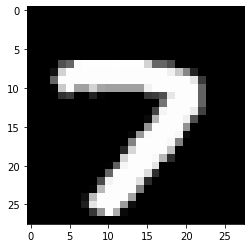

In [ ]:
n = np.random.randint(0,10000,1)

plt.figure(figsize = (4,4))
plt.imshow(x_test[n].reshape(28, 28), cmap = 'gray')

print('The Answer is ', np.argmax(model.predict(x_test[n]), axis = -1))